# Ad Hoc в SkyTaxi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [16]:
df        = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 1. Исследование в такси/Data_Skytaxi.csv', sep=';')
df_city   = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 1. Исследование в такси/city_dict.csv', sep=';')
df_tariff = pd.read_csv('C:/Users/D.Elistratov/Documents/AD3.0/Финальные кейсы/Кейс 1. Исследование в такси/tariff_dict.csv', sep=';')

In [17]:
df.head()

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time
0,1146020,111,13,04.08.2022 7:12,NaN,NaN,NaN
1,1146340,114,11,02.08.2022 19:12,02.08.2022 19:19,02.08.2022 19:26,02.08.2022 19:50
2,1142747,112,13,01.08.2022 13:47,01.08.2022 13:53,01.08.2022 13:59,01.08.2022 14:16
3,1137227,111,17,03.08.2022 15:45,NaN,NaN,NaN
4,1137156,111,13,02.08.2022 15:00,02.08.2022 15:02,02.08.2022 15:11,02.08.2022 15:26


In [18]:
df = df.merge(df_city, on = 'id_city')
df = df.merge(df_tariff, on = 'id_tariff')

In [19]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['assign_time'] = pd.to_datetime(df['assign_time'])
df['arrive_time'] = pd.to_datetime(df['arrive_time'])
df['ride_finish_time'] = pd.to_datetime(df['ride_finish_time'])

## Задание 1. Часы пик

In [20]:
df['hour'] = df['order_time'].dt.hour

In [37]:
#df

In [21]:
df['nflag_rush_hour'] = np.where(df['hour'].isin([7,8,9,10,17,18,19,20]),1,0)

In [22]:
df_gr = df.groupby(['nflag_rush_hour']).count()[['order_time']].reset_index()
df_gr_city = df.groupby(['nflag_rush_hour','name_city']).count()[['order_time']].reset_index()

#### Задание 1.1. График с суточными часами

C:\Users\D.Elistratov\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


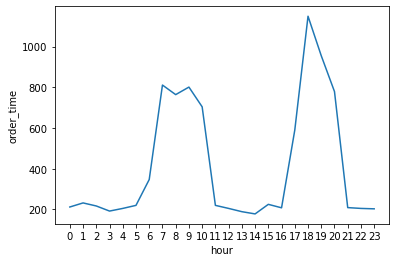

In [23]:
df_graph = df.groupby(['hour']).count()['order_time'].reset_index()

ax = sns.lineplot(df_graph['hour'],df_graph['order_time'])
ax.set(xticks=df_graph['hour'].values)
plt.show()
### https://stackoverflow.com/questions/54186083/lineplot-doesnt-show-all-dates-in-axis

#### Задание 1.2. На сколько заказов больше в часы пик в среднем в час по всем городам вместе?

In [24]:
df_gr

,nflag_rush_hour,order_time
0,0,3467
1,1,6553


In [29]:
df_gr['cnt_order_by_hour'] = np.where(df_gr['nflag_rush_hour']==0,df_gr['order_time']/16,df_gr['order_time']/8)

In [31]:
#######  По всем городам суммарно

df_gr[df_gr['nflag_rush_hour']==1]['cnt_order_by_hour'].item() - df_gr[df_gr['nflag_rush_hour']==0]['cnt_order_by_hour'].item()

602.4375

#### Задание 1.3. На сколько заказов больше в часы пик в среднем в час по городам по отдельности?

In [34]:
df_gr_city['cnt_order_by_hour'] = np.where(df_gr_city['nflag_rush_hour']==0,df_gr_city['order_time']/16,df_gr_city['order_time']/8)

In [35]:
for i in df_gr_city['name_city'].unique():
    print(i)
    print(df_gr_city[(df_gr_city['nflag_rush_hour']==1) & (df_gr_city['name_city']==i)]['cnt_order_by_hour'].item() 
          - df_gr_city[(df_gr_city['nflag_rush_hour']==0) & (df_gr_city['name_city']==i)]['cnt_order_by_hour'].item())

Екатеринбург
35.4375
Казань
56.9375
Краснодар
46.9375
Красноярск
30.625
Москва
182.8125
Новосибирск
54.5
Санкт-Петербург
119.75
Тюмень
36.625
Хабаровск
38.8125


#### Задание 1.4. В каком городе наблюдается наибольшее отклонение конверсии Order2Ride в пиковые часы по сравнению с не-пиковыми часами?

In [15]:
df_o2r = df.groupby(['nflag_rush_hour','name_city']).count()[['order_time', 'ride_finish_time']].reset_index()
df_o2r['o2r'] = df_o2r['ride_finish_time'] / df_o2r['order_time']

In [16]:
for i in df_o2r['name_city'].unique():
    print(i)
    print(df_o2r[(df_o2r['nflag_rush_hour']==1) & (df_o2r['name_city']==i)]['o2r'].item() 
          - df_o2r[(df_o2r['nflag_rush_hour']==0) & (df_o2r['name_city']==i)]['o2r'].item())

Екатеринбург
0.0065733366571761875
Казань
-0.025245880069734494
Краснодар
-0.034977388952284305
Красноярск
0.05901777559193422
Москва
-0.11725371157947678
Новосибирск
-0.021197182201500686
Санкт-Петербург
-0.09293651940710762
Тюмень
-0.00390165220802996
Хабаровск
0.06424165561768605


## Задание 2. Тюмень и Хабаровск

#### Задание 2.1. Новые города против остальных

In [17]:
df['nflag_new_city'] = np.where(df['name_city'].isin(['Тюмень','Хабаровск']),1,0)

In [18]:
df_gr2 = df.groupby('nflag_new_city').count()[['order_time','assign_time','arrive_time','ride_finish_time']].reset_index()

In [19]:
df_gr2['o2r'] = df_gr2['ride_finish_time'] / df_gr2['order_time']
df_gr2['o2ass'] = df_gr2['assign_time'] / df_gr2['order_time']
df_gr2['ass2arr'] = df_gr2['arrive_time'] / df_gr2['assign_time']
df_gr2['arr2r'] = df_gr2['ride_finish_time'] / df_gr2['arrive_time']

In [20]:
df_gr2

,nflag_new_city,order_time,assign_time,arrive_time,ride_finish_time,o2r,o2ass,ass2arr,arr2r
0,0,8764,6178,4877,4501,0.513578,0.704929,0.789414,0.922903
1,1,1256,565,468,333,0.265127,0.449841,0.828319,0.711538


In [21]:
df_gr2[df_gr2['nflag_new_city']==0]['o2r'].item() - df_gr2[df_gr2['nflag_new_city']==1]['o2r'].item()

0.24845088622535155

#### Задание 2.2. Просадки Тюмени и Хабаровска по отдельности

In [22]:
df['nflag_new_city2'] = np.where(df['name_city'].isin(['Тюмень','Хабаровск']),df['name_city'],'Other')

In [23]:
df_gr22 = df.groupby('nflag_new_city2').count()[['order_time','assign_time','arrive_time','ride_finish_time']].reset_index()

In [24]:
df_gr22['o2r']     = df_gr22['ride_finish_time'] / df_gr22['order_time']
df_gr22['o2ass']   = df_gr22['assign_time']      / df_gr22['order_time']
df_gr22['ass2arr'] = df_gr22['arrive_time']      / df_gr22['assign_time']
df_gr22['arr2r']   = df_gr22['ride_finish_time'] / df_gr22['arrive_time']

In [25]:
df_gr22

,nflag_new_city2,order_time,assign_time,arrive_time,ride_finish_time,o2r,o2ass,ass2arr,arr2r
0,Other,8764,6178,4877,4501,0.513578,0.704929,0.789414,0.922903
1,Тюмень,632,352,295,169,0.267405,0.556962,0.838068,0.572881
2,Хабаровск,624,213,173,164,0.262821,0.341346,0.812207,0.947977


In [26]:
######## Рекомендации менеджменту Хабаровска:
######## требуется больше водителей, так как мы проседаем из-за недостатка назначений водителей

######## Тюмень, кажется, подходит для третьего задания

## Задание 3. Фрод

In [27]:
df_gr3          = df.groupby('name_city').count()[['arrive_time','ride_finish_time']].reset_index()
df_gr3['arr2r'] = df_gr3['ride_finish_time'] / df_gr3['arrive_time']

In [28]:
df_gr3

,name_city,arrive_time,ride_finish_time,arr2r
0,Екатеринбург,354,333,0.940678
1,Казань,528,506,0.958333
2,Краснодар,457,428,0.936543
3,Красноярск,320,195,0.609375
4,Москва,1594,1505,0.944166
5,Новосибирск,525,501,0.954286
6,Санкт-Петербург,1099,1033,0.939945
7,Тюмень,295,169,0.572881
8,Хабаровск,173,164,0.947977


In [29]:
############  Направляем в отдел антифрода информацию по Тюмени и Красноярску

## Задание 4. Тариф "Доставка"

In [38]:
df_del = df[df['name_tariff']=='Доставка']

######  Удаляем Краснодар
df_del = df_del[df_del['name_city']!='Краснодар']

In [39]:
df_del

,order_id,id_tariff,id_city,order_time,assign_time,arrive_time,ride_finish_time,name_city,name_tariff,hour,nflag_rush_hour
9365,1140485,115,13,2022-04-08 08:30:00,NaT,NaT,NaT,Казань,Доставка,8,1
9366,1143658,115,13,2022-05-08 07:12:00,NaT,NaT,NaT,Казань,Доставка,7,1
9367,1146695,115,13,2022-03-08 18:28:00,2022-03-08 18:32:00,2022-03-08 18:51:00,2022-03-08 19:04:00,Казань,Доставка,18,1
9368,1146342,115,13,2022-07-08 07:46:00,2022-07-08 07:51:00,2022-07-08 08:11:00,2022-07-08 08:22:00,Казань,Доставка,7,1
9369,1146481,115,13,2022-03-08 10:33:00,2022-03-08 10:37:00,NaT,NaT,Казань,Доставка,10,1
...,...,...,...,...,...,...,...,...,...,...,...
10015,1137067,115,14,2022-05-08 16:29:00,2022-05-08 16:38:00,2022-05-08 16:55:00,2022-05-08 17:08:00,Новосибирск,Доставка,16,0
10016,1142641,115,14,2022-04-08 05:24:00,NaT,NaT,NaT,Новосибирск,Доставка,5,0
10017,1136917,115,14,2022-03-08 02:59:00,2022-03-08 03:06:00,2022-03-08 03:25:00,2022-03-08 03:35:00,Новосибирск,Доставка,2,0
10018,1146236,115,14,2022-01-08 07:18:00,2022-01-08 07:22:00,2022-01-08 07:42:00,2022-01-08 07:54:00,Новосибирск,Доставка,7,1


In [72]:
df_del_gr = df_del.groupby('name_city').count()[['order_time','assign_time','arrive_time','ride_finish_time']].reset_index()

df_del_gr['o2ass']       = df_del_gr['assign_time'] / df_del_gr['order_time']
#df_del_gr['o2ass_var']   = df_del_gr['o2ass'] * (1 - df_del_gr['o2ass'])

df_del_gr['ass2arr']     = df_del_gr['arrive_time'] / df_del_gr['assign_time']
#df_del_gr['ass2arr_var'] = df_del_gr['ass2arr'] * (1 - df_del_gr['ass2arr'])

df_del_gr['arr2r'] = df_del_gr['ride_finish_time'] / df_del_gr['arrive_time']
#df_del_gr['arr2r_var'] = df_del_gr['arr2r'] * (1 - df_del_gr['arr2r'])

df_del_gr['o2r'] = df_del_gr['ride_finish_time'] / df_del_gr['order_time']
#df_del_gr['o2r_var'] = df_del_gr['o2r'] * (1 - df_del_gr['o2r'])

In [78]:
df_del_gr['o2r_upper'] = df_del_gr['o2r'] + 1.96*(df_del_gr['o2r']*(1-df_del_gr['o2r'])/df_del_gr['order_time']).apply(np.sqrt)
df_del_gr['o2r_lower'] = df_del_gr['o2r'] - 1.96*(df_del_gr['o2r']*(1-df_del_gr['o2r'])/df_del_gr['order_time']).apply(np.sqrt)

df_del_gr['o2ass_upper'] = df_del_gr['o2ass'] + 1.96*(df_del_gr['o2ass']*(1-df_del_gr['o2ass'])/df_del_gr['order_time']).apply(np.sqrt)
df_del_gr['o2ass_lower'] = df_del_gr['o2ass'] - 1.96*(df_del_gr['o2ass']*(1-df_del_gr['o2ass'])/df_del_gr['order_time']).apply(np.sqrt)

df_del_gr['ass2arr_upper'] = df_del_gr['ass2arr'] + 1.96*(df_del_gr['ass2arr']*(1-df_del_gr['ass2arr'])/df_del_gr['assign_time']).apply(np.sqrt)
df_del_gr['ass2arr_lower'] = df_del_gr['ass2arr'] - 1.96*(df_del_gr['ass2arr']*(1-df_del_gr['ass2arr'])/df_del_gr['assign_time']).apply(np.sqrt)

df_del_gr['arr2r_upper'] = df_del_gr['arr2r'] + 1.96*(df_del_gr['arr2r']*(1-df_del_gr['arr2r'])/df_del_gr['arrive_time']).apply(np.sqrt)
df_del_gr['arr2r_lower'] = df_del_gr['arr2r'] - 1.96*(df_del_gr['arr2r']*(1-df_del_gr['arr2r'])/df_del_gr['arrive_time']).apply(np.sqrt)

In [79]:
df_del_gr

,name_city,order_time,assign_time,arrive_time,ride_finish_time,o2ass,ass2arr,arr2r,o2r,o2r_upper,o2r_lower,o2ass_upper,o2ass_lower,ass2arr_upper,ass2arr_lower,arr2r_upper,arr2r_lower
0,Екатеринбург,47,37,31,28,0.787234,0.837838,0.903226,0.595745,0.736047,0.455442,0.904241,0.670228,0.956609,0.719067,1.007302,0.799149
1,Казань,55,42,34,33,0.763636,0.809524,0.970588,0.600000,0.729473,0.470527,0.875918,0.651355,0.928283,0.690765,1.027381,0.913795
2,Красноярск,38,31,25,18,0.815789,0.806452,0.720000,0.473684,0.632441,0.314928,0.939046,0.692533,0.945530,0.667373,0.896008,0.543992
3,Москва,220,155,118,112,0.704545,0.761290,0.949153,0.509091,0.575152,0.443030,0.764835,0.644256,0.828402,0.694178,0.988791,0.909514
4,Новосибирск,65,43,39,38,0.661538,0.906977,0.974359,0.584615,0.704416,0.464815,0.776574,0.546503,0.993796,0.820158,1.023967,0.924751
5,Санкт-Петербург,137,100,74,70,0.729927,0.740000,0.945946,0.510949,0.594656,0.427242,0.804276,0.655578,0.825972,0.654028,0.997467,0.894425
6,Тюмень,44,11,8,7,0.250000,0.727273,0.875000,0.159091,0.267166,0.051015,0.377947,0.122053,0.990465,0.464081,1.104177,0.645823
7,Хабаровск,47,16,12,11,0.340426,0.750000,0.916667,0.234043,0.355090,0.112995,0.475898,0.204953,0.962176,0.537824,1.073046,0.760287


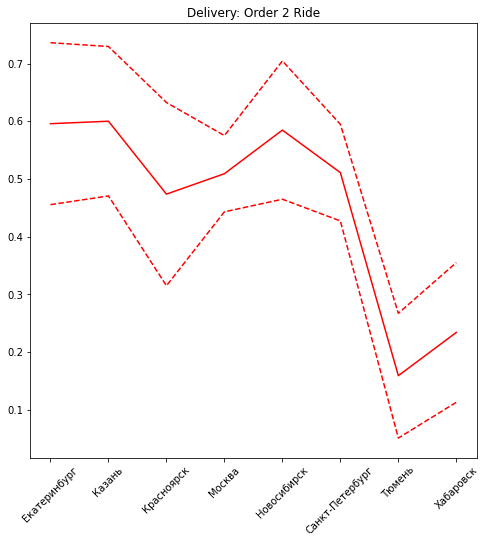

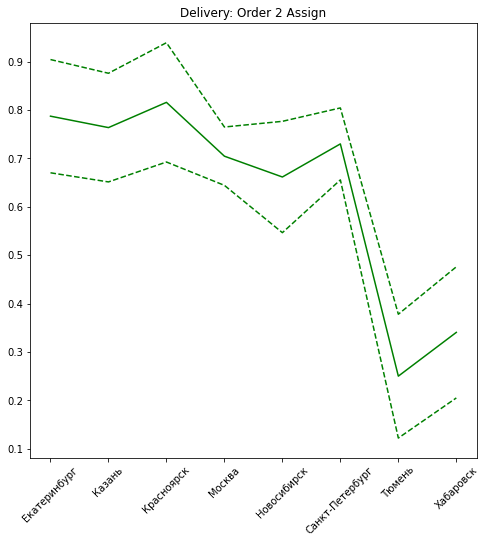

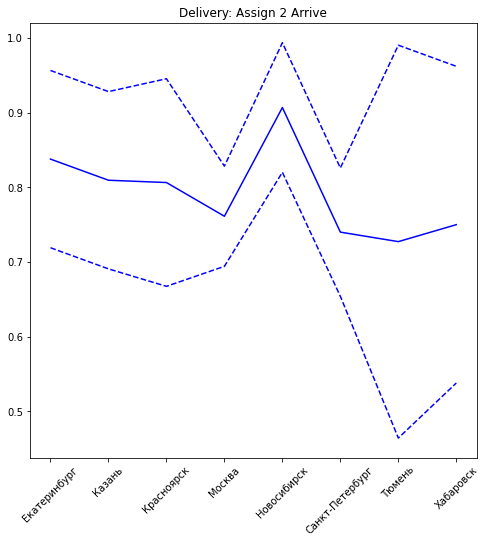

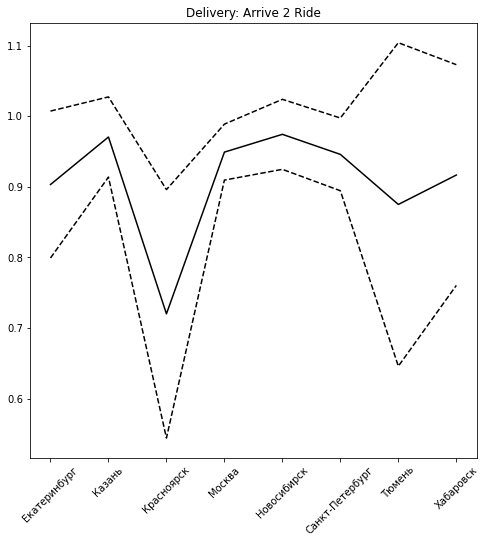

In [89]:
plt.figure()
plt.rcParams["figure.figsize"] = (8,8)

plt.plot(df_del_gr['name_city'], df_del_gr['o2r'], color = 'red')
plt.plot(df_del_gr['name_city'], df_del_gr['o2r_upper'], color = 'red', linestyle='--')
plt.plot(df_del_gr['name_city'], df_del_gr['o2r_lower'], color = 'red', linestyle='--')
plt.xticks(rotation=45)
plt.title('Delivery: Order 2 Ride')
plt.show()

plt.plot(df_del_gr['name_city'], df_del_gr['o2ass'], color = 'green')
plt.plot(df_del_gr['name_city'], df_del_gr['o2ass_upper'], color = 'green', linestyle='--')
plt.plot(df_del_gr['name_city'], df_del_gr['o2ass_lower'], color = 'green', linestyle='--')
plt.xticks(rotation=45)
plt.title('Delivery: Order 2 Assign')
plt.show()

plt.plot(df_del_gr['name_city'], df_del_gr['ass2arr'], color = 'blue')
plt.plot(df_del_gr['name_city'], df_del_gr['ass2arr_upper'], color = 'blue', linestyle='--')
plt.plot(df_del_gr['name_city'], df_del_gr['ass2arr_lower'], color = 'blue', linestyle='--')
plt.xticks(rotation=45)
plt.title('Delivery: Assign 2 Arrive')
plt.show()

plt.plot(df_del_gr['name_city'], df_del_gr['arr2r'], color = 'black')
plt.plot(df_del_gr['name_city'], df_del_gr['arr2r_upper'], color = 'black', linestyle='--')
plt.plot(df_del_gr['name_city'], df_del_gr['arr2r_lower'], color = 'black', linestyle='--')
plt.xticks(rotation=45)
plt.title('Delivery: Arrive 2 Ride')
plt.show()